Parte 1

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [30]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [31]:
print(df.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [32]:
tabla_frecuencias = df['category'].value_counts()
tabla_frecuencias

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [33]:
top5_categorias = tabla_frecuencias.head(5)
print("Top 5 categorías:")
print(top5_categorias)

Top 5 categorías:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


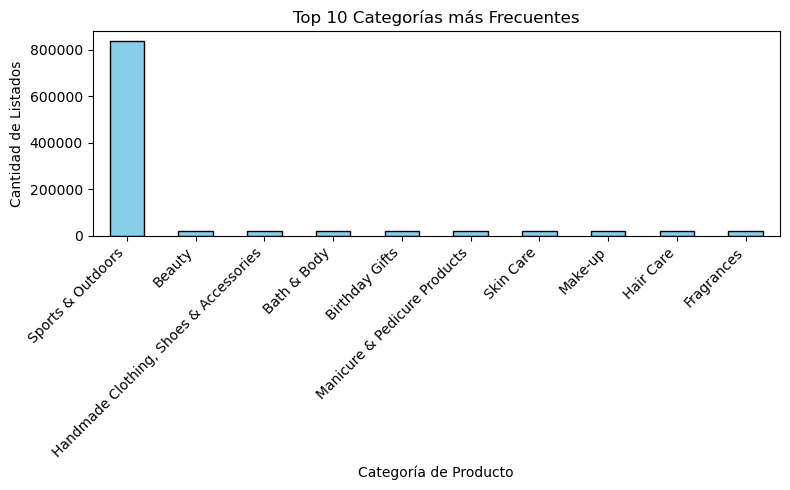

In [34]:
plt.figure(figsize=(8,5))
top10 = tabla_frecuencias.head(10)
top10.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Categorías más Frecuentes')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad de Listados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


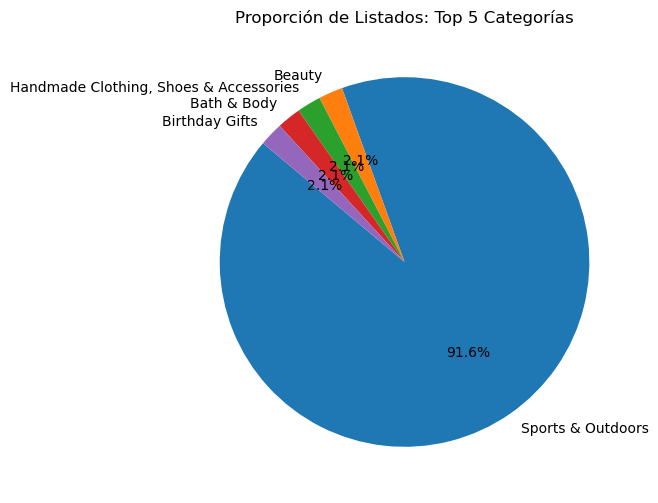

In [35]:

plt.figure(figsize=(6,6))
top5_categorias.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Listados: Top 5 Categorías')
plt.ylabel('')
plt.show()


Parte 2


In [36]:
media = df['price'].mean()
mediana = df['price'].median()
moda = df['price'].mode()[0]
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")


Media: 89.24380943923663
Mediana: 19.09
Moda: 9.99


In [37]:
#Existe una diferencia considerable entre la media y la moda

In [38]:
varianza = df['price'].var()
std_dev = df['price'].std()
rango_precios = df['price'].max() - df['price'].min()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

print("\n📊 Medidas de Dispersión:")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {std_dev:.2f}")
print(f"Rango: £{rango_precios:.2f}")
print(f"Rango intercuartílico (IQR): £{iqr:.2f}")



📊 Medidas de Dispersión:
Varianza: 119445.49
Desviación estándar: 345.61
Rango: £100000.00
Rango intercuartílico (IQR): £36.00


In [28]:
# El valor de la desviación estándar es considerablemente alto, lo que indica que los precios están muy dispersos.
# Desviación estándar: 345 lo cual refuerz ala idea d emucha variacion
# El rango es 100,000 lo cual indica que hay outliers debido a la gran differencia.
# el 50% central de los productos tienen un precio entre el Q1 y Q3.
# Indicando que la mayoria de los productos tienen precios similares y bajos.


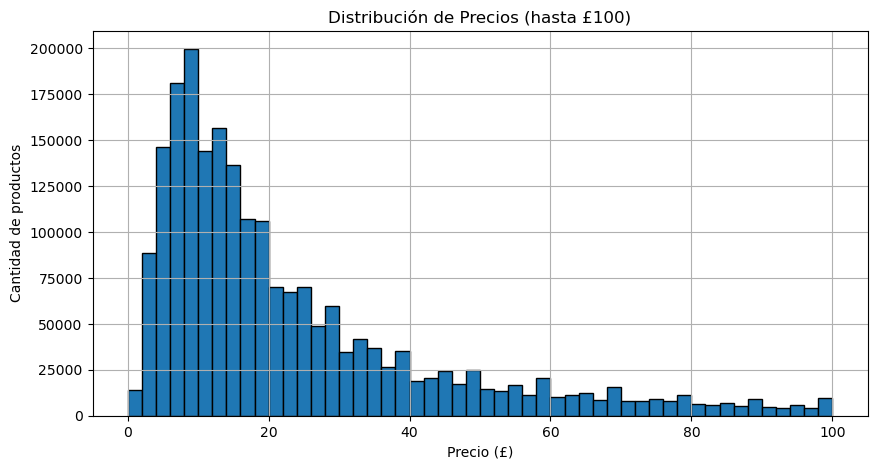

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df[df['price'] <= 100]['price'], bins=50, edgecolor='black') 
plt.title('Distribución de Precios (hasta £100)')
plt.xlabel('Precio (£)')
plt.ylabel('Cantidad de productos')
plt.grid(True)
plt.show()

Parte 3 

In [44]:
# Asegurarse de que 'stars' esté en formato numérico
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
df = df.dropna(subset=['stars'])

mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print("📌 Medidas de Centralidad:")
print(f"Media: {mean_rating:.2f}")
print(f"Mediana: {median_rating}")
print(f"Moda: {mode_rating}")


📌 Medidas de Centralidad:
Media: 2.15
Mediana: 0.0
Moda: 0.0


In [45]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
iqr_rating = q3 - q1

print("\n📊 Medidas de Dispersión:")
print(f"Varianza: {variance_rating:.2f}")
print(f"Desviación estándar: {std_dev_rating:.2f}")
print(f"IQR: {iqr_rating:.2f}")



📊 Medidas de Dispersión:
Varianza: 4.82
Desviación estándar: 2.19
IQR: 4.40


In [46]:
from scipy.stats import skew, kurtosis

skewness = skew(df['stars'])
kurt = kurtosis(df['stars'])

print("\n📈 Forma de la Distribución:")
print(f"Skewness (Sesgo): {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")



📈 Forma de la Distribución:
Skewness (Sesgo): 0.08
Kurtosis: -1.93


In [ ]:
# El sesgo positivo indica que la cola derecha es más larga o más pesada que la izquierda, 
# lo que sugiere que hay algunos productos con calificaciones excepcionalmente altas.
# La kurtosis indica que la distribución es más plana y dispersa.


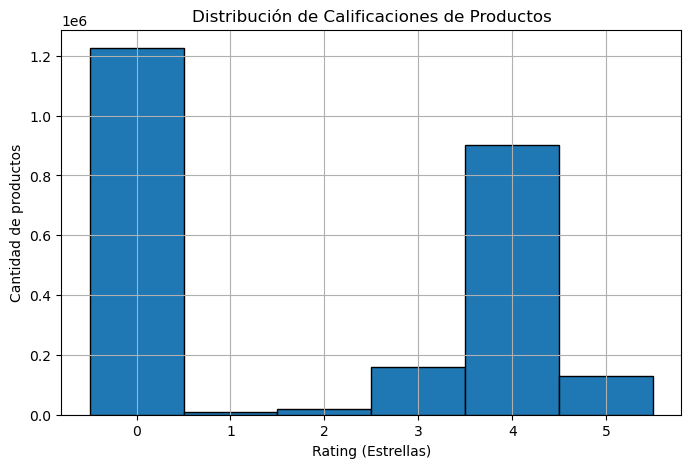

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['stars'], bins=[0,1,2,3,4,5,6], edgecolor='black', align='left')
plt.title('Distribución de Calificaciones de Productos')
plt.xlabel('Rating (Estrellas)')
plt.ylabel('Cantidad de productos')
plt.xticks(range(6))
plt.grid(True)
plt.show()
